Przewidywanie i utrzymywanie odpowiedniego stanu magazynowego produktów  
==============

**Autorzy:** *Dworaczyk Marek* i *Czech Piotr*

<br><br>

# Spis treści

1. [Wprowadzenie](#wprowadzenie)
    * [Motywacja](#motywacja)
    * [Sformułowanie problemu](#sformułowanie-problemu)
2. [Zerowy czas dostawy, $\tau = 0$](#zerowy-czas-dostawy)
3. 

<br><br>

# Wprowadzenie

## Motywacja

Przedmiotem naszych badań został magazyn, czyli serce całego organizmu dostaw i podstawa logistyki. Jest on miejscem kluczowym i elementarnym przy kupowaniu, wysyłaniu czy dostarczaniu jakichkolwiek produktów. Na łamach tej pracy chcielibyśmy się przyjrzeć politykom uzupełnien magazynu oraz czynnikom, które wpływają na stan magazynowy produktu. Zrobimy to wszystko, aby końcowo przedstawić matematyczną propozycję, jak utrzymywać odpowiedni stan magazynowy produktu. Wiemy, że w tej dziedzinie każda godzina ma znaczenie, dlatego odpowiednie planowanie dostaw i zamówień - tak aby odpowiednie produkty zawsze były w określonym stanie, ma olbrzymie znaczenie - bo często nie mówimy tu o godzinach opoóźnień, ale <i>dniach</i>.
<br>

Całość naszej pracy rozpoczeniemy od próby matematycznego opisania czynników wpływających na stan produktu. Dodatkowo w tak skomplikowanych środowiskach logistycznych, jak magazyn, ważnym czynnikiem jest też dobranie odpowiedniej strategii uzupełnień i planowania dostaw, aby nie zamawiać wszystkiego na przysłowiowe <i>hura</i>. Poruszymy zatem po krótce polityki uzupełnień magazynu, w tym wybrany przez nas schemat, aby praca ta była dla czytelnika maksymalnie klarowna odnośnie poruszanej zawartości.
<br>

Naszym celem będzie stopniowe analizowanie bardziej złożonego problemu i wzięcie pod uwagę trafniej dostosowanych parametrów równania. Natomiast zaczniemy od najprostrzego ujęcia problemu. To, co uważamy za istotne to nie stworzenie długiego i przekomplikowanego modelu, a znalazienie schematu, który pozwoli nam <i>dostatecznie dobrze</i> przybliżać oczekiwane przez nas wartości. 
<br>

Naukowym punktem wyjścia została dla nas praca autorstwa Arpad Gy. T. Csik, Tamas L. Horvath i Peter Foldesi pod tytułem "An Approximate Analytic Solution of the Inventory Balance Delay Differential Equation", która pomogła nam dostrzeć oraz zrozumieć podstawowe problemy i zagadnienia podczas poruszania się w temacie planowania dostaw na magazynie. Sama praca jest również analizą różnych podejść do tego samego problemu, dlatego zaciekawionych zachęcamy do źródła.
<br>

## Sformułowanie problemu

### Zwiększanie stanu

Magazyn kojarzy nam się pierwszorzędnie z <i>przechowywaniem</i> wskazanych rzeczy. Na moment pisania tej pracy teleportacja jeszcze nie jest możliwa, a więc aby przedmiot pojawił się w magazynie, musi być: zamówiony i przyjęty. Mówiąc <i>"przyjęty"</i>, tak naprawdę cicho założyliśmy jeszcze jeden czynnik - ten produkt musi być dostarczony, co kolejno prowadzi nas do konkluzji, że każdy towar ma <b>pewien czas dostawy</b>. Podsumowując, określimy sobie pewną funkcję R (receive):

$$R = R(t) : t \in [0, \infty),$$

która będzie informować nas o wielkości dostawy w dowolnie podanej chwili $t$. Wracając do wyszczególnionego procesu:
1. zamówienie
2. dostarczanie
3. przyjęcie
funkcja $R$ określiła nam proces przyjęcia. Zdefiniujmy teraz proces <i>zamówienia</i>:

$$O = O(t) : t \in [0, \infty).$$

Dzięki tym definicjom i wykorzystaniu brakującego etapu dostarczania - który zajmuje czas, ponieważ kurier musi do nas dotrzeć, opisujemy proces dostaw następująco: 

$$
R(t) = O(t - \tau) : t,\tau \in [0, \infty).
$$

<i>tutaj zrobie obrazek w figmie z osią czasu, żeby to ładniej pokazać</i> 

Takie zabiegi pozwoliły nam opisać sytuację życiową: jeśli przykładowo $\tau = 2\ [dni]$ to zamawiając w poniedziałek ($t=1$) 16 sztuk towaru $O(1) = 16$ to dopiero w środę ($t=3$):

$$
R(3) = O(t - \tau) = O(3 - 2) = O(1) = 16,
$$

odnujemy zwiększenie się towaru na podstawie poniedziałkowego zamówienia.

### Zmniejszanie stanu

Nasz towar na magazynie zmniejszy się tylko w momencie, gdy znajdzie się na niego chętny i go zamówi. Jest to sytuacja prostrza, bo nas jako zarządzających i odpowiadających za stan produkt na tym etapie nie interesuje <i>ile towar będzie dostarczany do klienta</i>. Ważny jest dla nas ile sztuk musimy wydać dzisiejszego dnia z magazynu zatem, określimy sobię funkcję D (demand):

$$
D = D(t) : t \in [0, \infty).
$$

Dla uproszczenia w pierwotnym schemacie przyjmiemy, że częstotliwość zamówien jest stała każdego dnia, a więc:

$$
D(t) = \begin{cases} 
      0 & \text{dla } t \lt 0 \\
      D_0 & \text{dla } t \geq 0 
   \end{cases},\ \text{gdzie } D_0 \in \mathbb{N}.
$$


### Równanie zmiany stanu

Zdefiniowaliśmy dwa niezbędne i podstawowe procesy: wydawanie i przyjęcie. Do opisania świata brakuje nam tylko definicji <i>ile my tak naprawdę tego towaru mamy</i>. Zatem, chcielibyśmy określić funkcję I (inventory):

$$
I = I(t) : t \in [0, \infty),
$$

która wskazuja nam ilość produktu na magazynie - jego <b>stan magazynowy</b>. Dodatkowo, nie zakładamy, że podczas analizy nasz towar musi być na starcie pusty, ponieważ w realnym świecie cięzko, abyśmy najpierw opróżnili cały magazyn a później starali się wprowadzić nowe procesy - musi to być jak najbardziej możliwe płynne przejście, zatem definiujemy warunek początkowy:

$$
I(0) = I_0 : I_0 \in \mathbb{N} \cup \{0\}.
$$

Dzięki temu możemy teraz opisać cały ten proces, równanie opisujące zmiane stanu magazynowego produktu:

$$
\begin{equation}
\frac{dI}{dt} = R(t) - D(t) : t \in [0, \infty),
\end{equation}
$$

danego dnia nasz stan magazynowy powiększy się o towar przyjęty, a zmniejszy się o towar wysłany.

### Polityka uzupełnień

Zanim natomiast zdecydujemy się zapisać w kodzie powyższe równanie musimy przyjąć strategię działania funkcji $O(t)$, poniewqaż na ten moment jest to nasza jedyna niewiadoma. Tak, jak wspominaliśmy na początku technik i polityk uzupełniania magazynu jest wiele, bla bla bla @Marek..

### Podsumowanie

W tym momencie potrafimy już podstawowo opisać świat magazynu, który nas otacza:

<i> tu zrobie grafike w figmie jak sie uda </i>

zatem przypomnijmy sobie nasze komponenty i przenieśmy je do kodu:
* $I(t)$ - <i>inventory value</i> - stan magazynowy w chwili $t$,
* $D(t)$ - <i>demand rate</i> - wielkość zamówień w chwili $t$,
* $O(t)$ - <i>orders rate</i> - ilość zamówionych sztuk produktu w chwili $t$,
* $R(t)$ - <i>receive rate</i> - ilość otrzymanych sztuk produktu w chwili $t$.

Co w kodzie odzwierciedlimy następująco:

In [1]:
I₀ = 0 # inital inventory value
Iₜ = 0 # target inventory value
τ = 0 # delay rate
T = 1 # relaxation factor

D(t) = t < 0 ? 0 : D₀ # demand rate function
O(t) = (I₀ - I(t)) / T # orders rate function
R(t) = O(t - τ) # receive rate function

# change of inventory level function 
function dI(t)
    R(t) - D(t)
end

dI (generic function with 1 method)

# Zerowy czas dostawy, $\tau = 0$

Rozważymy praktyczny przykład: <br>
Mamy magazyn którego maksymalna pojemność wynosi 10 000 jednostek
Nasz początkowy stan magazynu ustawimy na 7 000 jednostek (może być też 10 000) <br>
Na jedną jednostę czasu t (1 dzień, miesiąc, dowolne) będzie usuwane 500 jednostek z magazynu <br>
Naszym docelowym stanem będzie pełny magazyn (na pewno?) <br>
Jaki musi być order-rate, aby spełnić zapotrzebowania i doprowadzić magazyn do żądanego stanu?

<br>

In [57]:
# initial conditions
I₀ = 43
Iₜ = 43
D₀ = 3
T = 2 # relaxation 

2

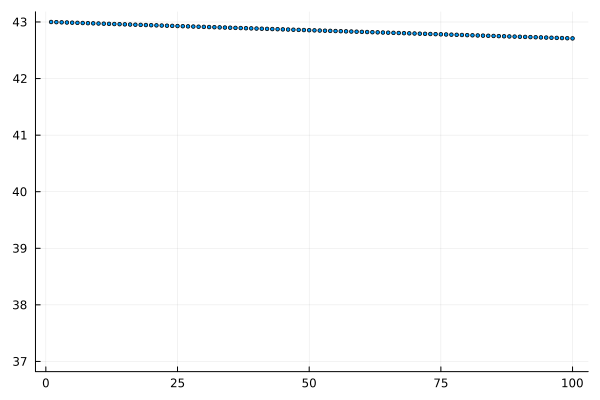

In [81]:
using Plots

h = 0.001
t = 2:h:100

D(t) = t < 0 ? 0 : D₀ # demand rate function
O(I) = (Iₜ - I) / T # orders rate function
R(I) = O(I) # receive rate function

# change of inventory level function 
function dI(t, I)
    R(I) - D(t)
end

function euler(t, I) # eulers forward method
    return I + (h * dI(t, I))
end

In = zeros(length(t) + 1)
In[1] = I₀

for day in t
    y = last(In)
    append!(In, euler(day - h, y))
end

scatter(1:100, In, legend=false, markersize=2) 